- 1) 분류가 잘 된 특허와 안 된 특허의 Y섹션의 비중 살펴보기 - 통계적 처리 방법 사용해서 차이가 난다고 볼 수 있는지 살펴보기
    - 데이터프레임 : 분류잘된특허/분류안된특허 → Y섹션 포함여부 1,0
    - t-test : 처리집단/대조집단 ~~ Y섹션 유뮤 or Y섹션 레이블 개수

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Y섹션 정보 불러오기

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Project/Capstone/data/wd(0.005)_lr(1e-5)_raw_epoch6_pred_prob_classification.csv",index_col=0)

true = pd.read_csv("/content/drive/MyDrive/Project/Capstone/data/test_label.csv",index_col=0) 
true.reset_index(inplace=True)
true.drop('index',axis=1,inplace=True)

In [ ]:
# 분류 잘 된 특허 불러오기
good = data[data['classification']==0]
good = true.loc[good.index,:]
good

# 분류 잘 안 된 특허 불러오기
no = data[data['classification']==1]
no = true.loc[no.index,:]
no

,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,H01M,...,H04S,H04T,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z
0,A solenoid assembly includes the solenoid arma...,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"A portable device includes solid-state memory,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"A screen plate, a packaging method, a display ...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,A vibration wave motor includes a first holdin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"In accordance with some embodiments, a trainin...",0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24278,According to a request to modify a configurati...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24279,The present invention improves performance of ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24282,The present disclosure relates to a car audio ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24283,The present invention relates to a computer-im...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/H_section_final.csv',index_col = 0)

ParserError: ignored

In [ ]:
good['Y'] = 0
no['Y'] = 0

In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(good))) : 
  good.iloc[i,-1] = df[df['patent_abstract'] == good.iloc[i,0]]['cpc_section_id'].values[0].split(',').count('Y')

In [ ]:
for i in tqdm(range(len(no))) : 
  no.iloc[i,-1] = df[df['patent_abstract'] == no.iloc[i,0]]['cpc_section_id'].values[0].split(',').count('Y')

In [ ]:
good.to_csv('/content/drive/MyDrive/Project/Capstone/data/good_classification_data_with_y.csv')
no.to_csv('/content/drive/MyDrive/Project/Capstone/data/bad_classification_data_with_y.csv')

# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
good = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/good_classification_data_with_y.csv')
bad = pd.read_csv('/content/drive/MyDrive/Project/Capstone/data/bad_classification_data_with_y.csv')

In [ ]:
good['y'] = good['Y'].apply(lambda x : 1 if x>0 else 0)
bad['y'] = bad['Y'].apply(lambda x : 1 if x>0 else 0)

In [ ]:
good

,Unnamed: 0,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,...,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z,Y,y
0,3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,Disclosed herein is a system for drilling in a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8,An analog-to-digital converting system include...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,A method for monitoring traffic in a network i...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,14,A three-dimensional semiconductor device inclu...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,24272,Methods for driving a tunable laser with integ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13170,24274,A system for reducing at least one of motor lo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
13171,24277,"A stream processor is disclosed, the stream pr...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13172,24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
good['y'].value_counts()

0    11413
1     1761
Name: y, dtype: int64

Text(0.5, 1.0, 'good classification patent with y')

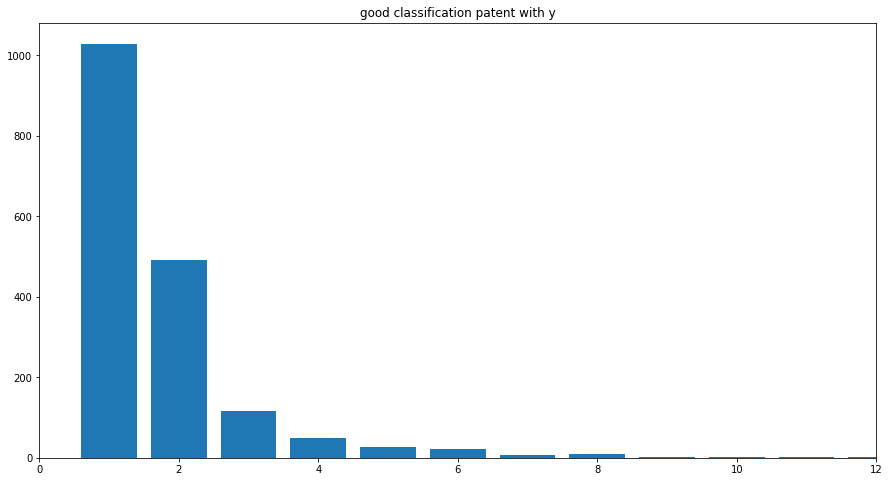

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(good['Y'].value_counts()[1:].index, good['Y'].value_counts()[1:].values)
plt.xlim(0,12)
plt.title('good classification patent with y')

Text(0.5, 1.0, 'bad classification patent with y')

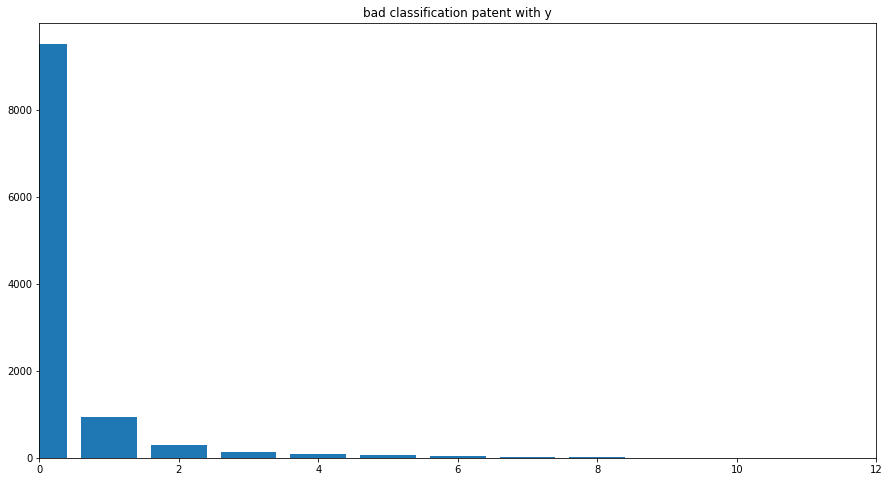

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(bad['Y'].value_counts().index, bad['Y'].value_counts().values)
plt.xlim(0,12)
plt.title('bad classification patent with y')

잘 분류되지 않은 특허에 Y섹션을 포함한 특허가 더 많아 보인다(0의 개수가 더 적으므로)

In [ ]:
good['y'] = good['Y'].apply(lambda x : 1 if x>0 else 0)
bad['y'] = bad['Y'].apply(lambda x : 1 if x>0 else 0)

In [ ]:
good

,Unnamed: 0,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,...,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z,Y,y
0,3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,Disclosed herein is a system for drilling in a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8,An analog-to-digital converting system include...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,A method for monitoring traffic in a network i...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,14,A three-dimensional semiconductor device inclu...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,24272,Methods for driving a tunable laser with integ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13170,24274,A system for reducing at least one of motor lo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
13171,24277,"A stream processor is disclosed, the stream pr...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13172,24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


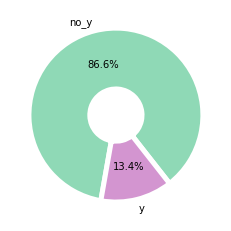

In [ ]:
labels = ['no_y','y']
colors = ['#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(good['y'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()


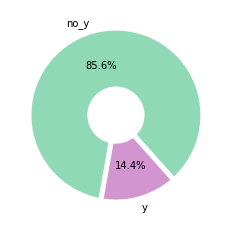

In [ ]:
labels = ['no_y','y']
colors = ['#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(bad['y'].value_counts(), labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

총 개수에 따른 차이가 날 수 있어서 비율로 비교!
잘못 분류된 특허에 y섹션을 가진 특허의 비율이 1%정도 많다

Text(0.5, 1.0, 'good classification y count in patent')

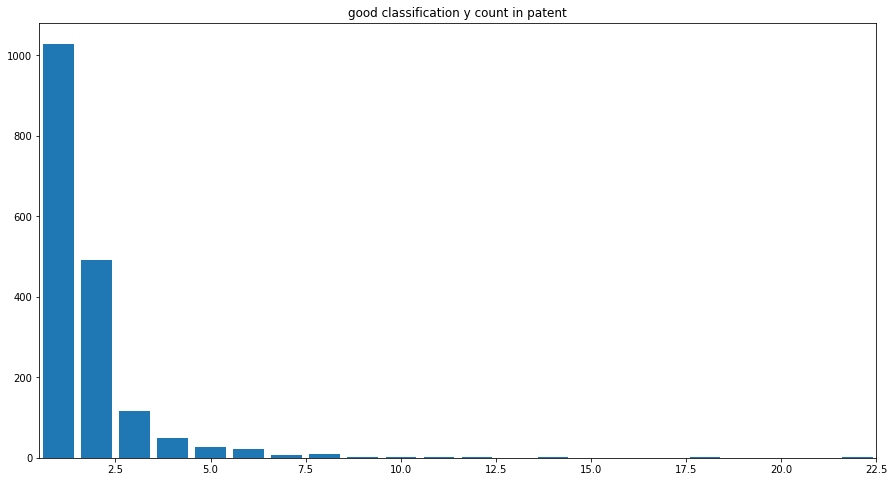

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(good.groupby('Y').count()['patent_abstract_y'].index[1:], good.groupby('Y').count()['patent_abstract_y'][1:])
plt.xlim(0.5, 22.5)
plt.title('good classification y count in patent')

Text(0.5, 1.0, 'bad classification y count in patent')

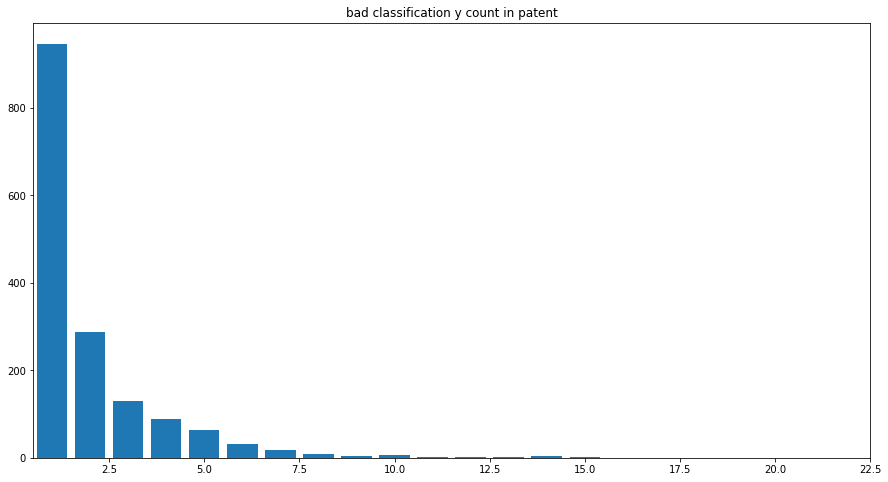

In [ ]:
plt.figure(figsize = (15, 8))
plt.bar(bad.groupby('Y').count()['patent_abstract_y'].index[1:], bad.groupby('Y').count()['patent_abstract_y'][1:])
plt.xlim(0.5, 22.5)
plt.title('bad classification y count in patent')

잘 분류된 특허와 잘 분류되지 않은 특허 중 Y섹션을 가진 특허들 대상으로 몇 개의 Y섹션에 해당하는지 살펴본 결과 y섹션의 개수에서는 별다른 차이를 보이지 않음

In [ ]:
good

,Unnamed: 0,patent_abstract_y,H01B,H01C,H01F,H01G,H01H,H01J,H01K,H01L,...,H04W,H05B,H05C,H05F,H05G,H05H,H05K,H99Z,Y,y
0,3,The subject matter discloses a computerized sy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,Disclosed herein is a system for drilling in a...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,8,An analog-to-digital converting system include...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,A method for monitoring traffic in a network i...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,14,A three-dimensional semiconductor device inclu...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13169,24272,Methods for driving a tunable laser with integ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13170,24274,A system for reducing at least one of motor lo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
13171,24277,"A stream processor is disclosed, the stream pr...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13172,24280,Concepts and technologies are disclosed herein...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_lists = []
for i in range(2, 54) :
  try : 
    y_lists.append(sum(good[good[good.columns[i]]==1]['y']==1)/sum(good[good.columns[i]]==1))
  except : 
    y_lists.append(0)

Text(0.5, 1.0, 'good classification y percent in each labels')

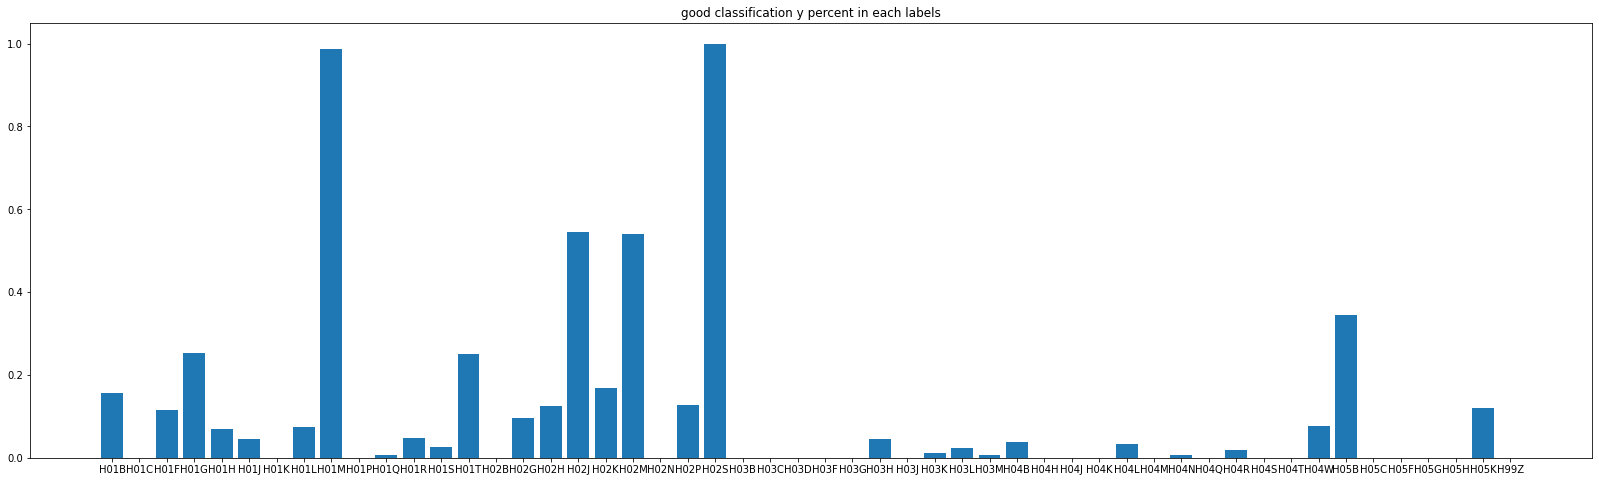

In [ ]:
plt.figure(figsize = (28, 8))
plt.bar(good.columns[2:54], y_lists)
plt.title('good classification y percent in each labels')

* H01M : 
방법 또는 수단, 예. 전지. 화학적 에너지의 전기 에너지로의 직접 변환을 위한 것
* H02S : 
적외선, 가시광선 또는 자외선의 변환에 의한 전력의 발생, 예. 광전지[PV] 모듈을 이용하는 것 (방사선원부터 전기 에너지를 얻는 것 G21H1/12; 광감 무기 반도체 장치 H01L31/00; 열전장치 H01L35/00; 초전장치 H01L37/00; 광감 유기 반도체 장치 H01L51/42)

In [ ]:
y_lists_b = []
for i in range(2, 54) :
  try : 
    y_lists_b.append(sum(bad[bad[bad.columns[i]]==1]['y']==1)/sum(bad[bad.columns[i]]==1))
  except : 
    y_lists_b.append(0)

Text(0.5, 1.0, 'bad classification y percent in each labels')

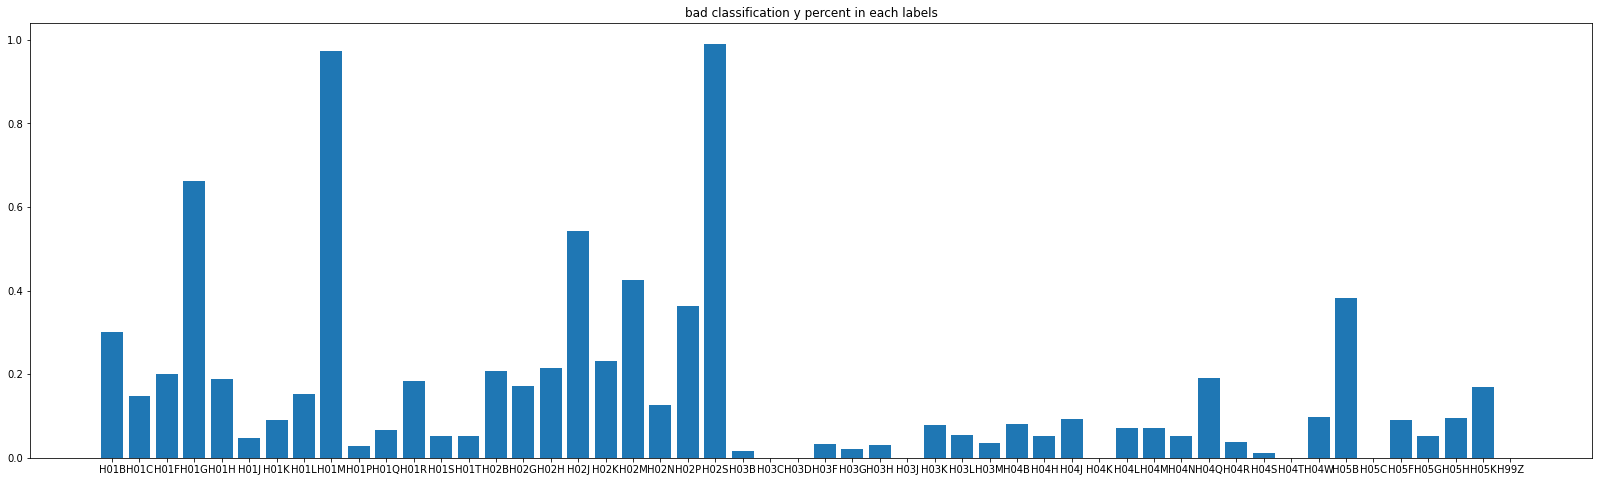

In [ ]:
plt.figure(figsize = (28, 8))
plt.bar(bad.columns[2:54], y_lists_b)
plt.title('bad classification y percent in each labels')

* H01G : 
콘덴서; 전해용 콘덴서, 정류기, 검파기, 개폐장치 또는 감광장치 (유전체로서의 특정재료의 선택 H01B3/00; 전위 점프 또는 표면 장벽이 있는 콘덴서 H01L29/00)

각 레이블별로 해당 레이블에 속하는 특허 중 y셕션을 가지고 있는 특허들의 비율 확인 결과 잘 분류되지 않은 특허들이 전반적으로 많은 확률로 y섹션 레이블들을 추가로 가지고 있다.

# 새 섹션

# 새 섹션

# t-test

#### 일표본 t-검정


  * 모집단의 구성 요소들이 정규분포를 이룬다는 가정
  * 종속변수는 연속형
  * 검증하고자 하는 기준값 존재
  * 단일 모집단이 알고자하는 값이 종속변수
  * 설정한 기준값과 종속변수의 평균값 사이의 차이가 통계적으로 유의미하다면 두 값은 다른 것

* EX] 과수원 예제
  * 귀무가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이다.
  * 대립가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이 아니다.

In [ ]:
#알려진 평균
mu = 200
#수집된 표본
data = [200,210,180,190,185,170,180,
       180,210,180,183,191,204,201,186]

#데이터가 적어도 30개 이상이면 중심극한 정리를 적용할 수 있지만
#여기서는 데이터 수가 15개 이기 때문에 별도의 정규성 검정이 필요
### 정규성 검정
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.9217348098754883, pvalue=0.20472252368927002)

* statistic : 검정통계치
* p-value가 유의수준 0.05보다 크면 정규분포

Text(0.5, 1.0, 'box plot')

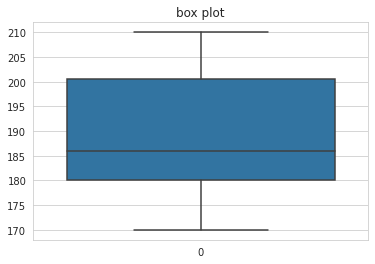

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

sns.boxplot(data=data)
plt.title('box plot')

In [ ]:
# 일표본 t-검정
from scipy.stats import ttest_1samp

ttest_1samp(data, mu)

Ttest_1sampResult(statistic=-3.156271429370956, pvalue=0.007003780898109026)

p-value가 유의수준0.05보다 작기때문에 귀무가설을 기각하고, A과수원에서 생산되는 사과의 평균무게는 200g이 아니다라고 결론

In [ ]:
#자유도 계산
df = len(data) - 1
print(df)

#평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(data)

14


(190.0, 183.20468237313676, 196.79531762686324)

#### 대응표본 t-검정

* 단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 다른 평균의 차이를 비교
* 하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개채들에 대해서 두번의 측정을 실시한다.
* 모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두 개
* 모집단의 관측값이 정규성을 만족 * 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다. / 종속변수는 연속형 변수여야함
* 부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구, before-after 연구 모두 paired t-test를 사용

* EX] 영양제 효과 판단
  * 귀무가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이가 없다.(D=0)
  * 대립가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 0보다 작다.(D<0)

In [ ]:
before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before', 'after']
when = [when[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when':when, 'score':before+after})
data.head(3)

,when,score
0,before,7
1,before,3
2,before,4


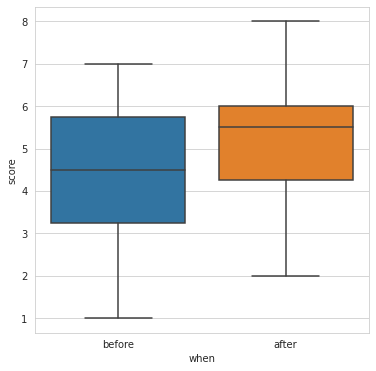

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='when', y='score', data=data)

In [ ]:
#정규성 검정
from scipy.stats import shapiro

normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

#p-value모두 0.05보다 크기 때문에 정규성에 문제가 없음.

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425) ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)


In [ ]:
# 등분산성 고려
from scipy.stats import levene
print(levene(before, after))

from scipy.stats import bartlett
print(bartlett(before, after))

#p-value가 0.05보다 커서 등분산성이 있다고 할 수 있다.

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167162444, pvalue=0.9296881301038217)


In [ ]:
import scipy.stats

# 대응표본 t검정 수행
scipy.stats.ttest_rel(before,after)

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

유의수준 0.05보다 작기때문에 귀무가설을 기각하고 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 줄었다라는 결론

#### 독립표본 t-검정

* 두 독립표본의 평균을 통계적으로 비교
  * 대응표본 : 부부 100쌍 중 남편 100명과 아내 100명으로 집단 비교
  * 독립표본 : 무작위로 남자 100명과 여자 100명 뽑아 두 집단 비교
* 논리
  * 두 집단의 모평균(모집단의 평균) 동일의 가설
    * 두 집단의 모평균 차이는 0
  * 표본평균들은 모집단 평균과 다를 수 있지만 차이 크지 않음
    * 표본평균의 차이는 0은 아닐 수 있지만 그리 큰 차이는 아님
  * 두 표본평균이 차이나는 정도에 대한 가능성을 바탕으로 두 집단의 모평균은 동일한지에 대해 판단

In [ ]:
good['y'].mean()

0.13367238500075906

In [ ]:
bad['y'].mean()

0.14364143641436414

In [ ]:
# 데이터가 10개뿐이므로 shapiro-wilks의 정규성을 검정해보자
normal1 = shapiro(good['y'])
normal2 = shapiro(bad['y'])
print(normal1, normal2)

#결과는 모두 p-value가 0.05보다 커서 정규성을 만족한다.

ShapiroResult(statistic=0.40157419443130493, pvalue=0.0) ShapiroResult(statistic=0.41698169708251953, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#levene test로 등분산성을 검정
from scipy.stats import levene, ttest_ind
print(levene(good['y'], bad['y']))

#등분산성을 bartlett test로 할 수도 있음 바틀렛
from scipy.stats import bartlett
print(bartlett(good['y'], bad['y']))

#p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 a,b두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음. 

LeveneResult(statistic=5.029116373090308, pvalue=0.02493359722315545)
BartlettResult(statistic=10.998778064033528, pvalue=0.0009117197564774613)


In [ ]:
ttest_ind(good['y'], bad['y'])

#검정 통계량은 -8.806, p-value는 6.085e-08이다. p-value가 0에 가까운 매우 작은 숫자로 
#유의수준보다 작기 때문에 귀무가설을 기각한다. 
#따라서 a,b두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다는 결론을 내릴 수 있음

Ttest_indResult(statistic=-2.24256914566537, pvalue=0.02493359722289703)

In [ ]:
#등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가합니다.

ttest_ind(good['y'], bad['y'], equal_var=False)

Ttest_indResult(statistic=-2.236827757414563, pvalue=0.025307002808330873)

In [ ]:
import scipy.stats

scipy.stats.ttest_ind(good['y'], bad['y'], equal_var=False)

Ttest_indResult(statistic=-2.236827757414563, pvalue=0.025307002808330873)

p<0.05 : 통계적으로 유이미함